<a href="https://colab.research.google.com/github/yazimberiluluer/Fully-Connected-for-MNIST/blob/main/Fully_Connected_for_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import cv2
import torch
import torch.nn as nn #torc hu nn üzeirnden kullanıyoruz
import torchvision.transforms as transforms
import torchvision.datasets as datasets #eğitim yaparken tüm verisetlerini locale indirmek vs ile uğraşmamak için
from torch.autograd import Variable #bunun içinden variables alıyor(?)
from torch.utils.data  import DataLoader, Dataset #torch içindeki yardımcı araçlar-> utilste

import matplotlib.pyplot as plt
from PIL import Image #PIL= Python Imaging Library ->bak
import numpy as np 

from google.colab.patches import cv2_imshow
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc


In [4]:
#precomputed mean and stdev 
mean_gray = 0.1307
stdev_gray = 0.3081
#transforms the image to tensors 
transforms_original = transforms.Compose([transforms.ToTensor(),
                    transforms.Normalize((mean_gray,),(stdev_gray,))])  #resim dönüşümü için trnasofrmsu kullanmıştık, compose da zincirliyo
transforms_photo = transforms.Compose([transforms.Resize((28,28)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((mean_gray,), (stdev_gray,))])

#Load Dataset

In [5]:
train_dataset = datasets.MNIST(root = './data',
                               train = True,
                               transform = transforms_original,
                               download = True)
test_dataset = datasets.MNIST(root = './data',
                               train = False,
                               transform = transforms_original,)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



#Random Imagee

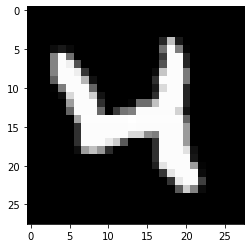

In [6]:
import matplotlib.pyplot as plt
# Data
random_image = train_dataset[20][0].numpy() * stdev_gray + mean_gray
plt.imshow(random_image.reshape(28,28), cmap='gray') #20 -> verinin indexi ,0 -> kendisini geitr demek

In [7]:
# Label
print(train_dataset[20][1])


4


In [8]:
# Iterable Dataset

batch_size = 100 #her iterasyon için kaç tane göndericeksin
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = batch_size,
                                          shuffle = False)

In [9]:
len(train_loader) #60000 i 100 er 100 er ayırdık çünkü batch_size la

600

In [10]:
len(test_loader)

100

In [11]:
len(train_dataset)

60000

In [12]:
print('Training Set (images) : {}'.format(len(train_dataset)))
print('Test Set (images) : {}'.format(len(test_dataset)))
print('Train Loader Batches :  {}'.format(len(train_loader)))
print('Test Loader Batches : {}'.format(len(test_loader)))

Training Set (images) : 60000
Test Set (images) : 10000
Train Loader Batches :  600
Test Loader Batches : 100


#Model Class

In [13]:
class FullyConnectedNet(nn.Module):
    def __init__(self):
        super(FullyConnectedNet, self).__init__()
        self.fc1 = torch.nn.Linear(784, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 10)
        """self.relu = nn.ReLU()
        self.fc1 = nn.Linear(in_features=1568, out_features=600)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(in_features=600, out_features=10) #out_feature 10 çünkü 0-9 arasında 10 farklı sınıf var
        #self.dropout = nn.Dropout(p=0.5)
        #self.fc3 = torch.nn.Linear(600, 10)"""

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        """print(x.shape)
        x = x.view(-1, 1568)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x"""


In [14]:
model = FullyConnectedNet() #FullyConnectedNet classının nesnesini oluşturduk
CUDA = torch.cuda.is_available() #cudayı kotnrol etmek için aktif mi vs
if CUDA:
  model = model.cuda() #her bir nesnein cuda diye bir fonksiyonu var ve eğer cuda aktifse 
  #yani sistemde NVIDIA kartları ve cuda sorunsuz kuruluysa hesaplamayı GPU üzerinde yap yani modeli GPU dan çalıştır
  #is_available() ile bunu sorugladık
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) #anlamadım


In [15]:
iteration = 0
correct = 0

for i,(inputs, labels) in enumerate(train_loader): #inputlar train_loader dan geliyor
#train_loader da belirlediğimiz batch_size ile iterasyon yapılacak şekilde parça parça veriyor

  CUDA = torch.cuda.is_available()
  if CUDA:
    inputs = inputs.cuda()
    labels = labels.cuda()

    print("Her bir iterasyonda...")
    print("Input Shape:  ", inputs.shape)
    print("Labels Shape: ", labels.shape)
    output = model(inputs)
    print("Output Shape:  ", output.shape) 
    _, predicted = torch.max(output,1)  # -> BU SATIRI ANLAMADIM
    print("Predicted Shape: ", predicted.shape)
    print("Predicted Tensor: ")
    print(predicted)
    correct += (predicted == labels).sum()
    break

Her bir iterasyonda...
Input Shape:   torch.Size([100, 1, 28, 28])
Labels Shape:  torch.Size([100])
Output Shape:   torch.Size([100, 10])
Predicted Shape:  torch.Size([100])
Predicted Tensor: 
tensor([3, 3, 3, 3, 9, 3, 3, 8, 6, 3, 9, 3, 3, 9, 3, 8, 3, 3, 3, 9, 9, 8, 3, 3,
        9, 3, 9, 3, 8, 8, 3, 3, 8, 9, 3, 9, 3, 3, 3, 3, 3, 9, 3, 3, 9, 3, 3, 8,
        3, 3, 3, 3, 8, 3, 8, 9, 8, 3, 3, 6, 9, 9, 9, 8, 3, 9, 8, 3, 3, 3, 3, 8,
        9, 3, 3, 3, 8, 8, 3, 6, 8, 0, 3, 9, 6, 3, 8, 8, 3, 3, 9, 0, 3, 3, 9, 9,
        3, 3, 0, 9], device='cuda:0')


# Training the Model

In [16]:
num_epochs = 25
#loss ve accuracy değerlerini lisstelerde tutuyoruz
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs): #burası 25 kez çalışıyo
  correct = 0
  iterations = 0
  iter_loss = 0.0

  model.train()

  for i,(inputs,labels) in enumerate(train_loader): #burası 600 kez çalışıyo
    CUDA = torch.cuda.is_available()
    if CUDA:
      inputs = inputs.cuda()
      labels = labels.cuda()
    
    outputs = model(inputs)
    loss = loss_fn(outputs,labels)
    #burada hesapladığımız loss değerini kaybetmemek için iter_loss aatıcaz
    iter_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() #update the weights

    _, predicted = torch.max(outputs,1)
    correct += (predicted == labels).sum()
    iterations += 1
  
  train_loss.append(iter_loss/iterations)
  train_accuracy.append((100*correct / len(train_dataset)))

  testing_loss = 0.0
  correct = 0
  iterations = 0

  model.eval() #nn ü evaluation moda yani değerlendirme ye sokacak

  for i, (inputs,labels) in enumerate(test_loader):
    if CUDA:
      inputs = inputs.cuda()
      labels = labels.cuda()
    
    outputs = model(inputs)
    loss = loss_fn(outputs,labels)
    testing_loss += loss.item()
     
    _, predicted = torch.max(outputs,1)
    correct += (predicted == labels).sum()
    iterations += 1
  
  test_loss.append(testing_loss/iterations)
  test_accuracy.append((100*correct/len(test_dataset)))

  print('Epoch {}/{}, Training Loss: {:.3f}, Training Accuracy: {:.3f}, Testing Loss: {:.3f}, Testing Accuracy: {:.3f}'
  .format(epoch+1, num_epochs, train_loss[-1], train_accuracy[-1], test_loss[-1], test_accuracy[-1]))


Epoch 1/25, Training Loss: 1.068, Training Accuracy: 72.638, Testing Loss: 0.424, Testing Accuracy: 88.270
Epoch 2/25, Training Loss: 0.371, Training Accuracy: 89.463, Testing Loss: 0.316, Testing Accuracy: 90.540
Epoch 3/25, Training Loss: 0.304, Training Accuracy: 91.145, Testing Loss: 0.273, Testing Accuracy: 92.230
Epoch 4/25, Training Loss: 0.268, Training Accuracy: 92.192, Testing Loss: 0.246, Testing Accuracy: 92.760
Epoch 5/25, Training Loss: 0.242, Training Accuracy: 92.942, Testing Loss: 0.225, Testing Accuracy: 93.280
Epoch 6/25, Training Loss: 0.221, Training Accuracy: 93.558, Testing Loss: 0.208, Testing Accuracy: 93.820
Epoch 7/25, Training Loss: 0.203, Training Accuracy: 94.128, Testing Loss: 0.191, Testing Accuracy: 94.400
Epoch 8/25, Training Loss: 0.187, Training Accuracy: 94.587, Testing Loss: 0.182, Testing Accuracy: 94.590
Epoch 9/25, Training Loss: 0.174, Training Accuracy: 94.953, Testing Loss: 0.171, Testing Accuracy: 94.970
Epoch 10/25, Training Loss: 0.162, Tr

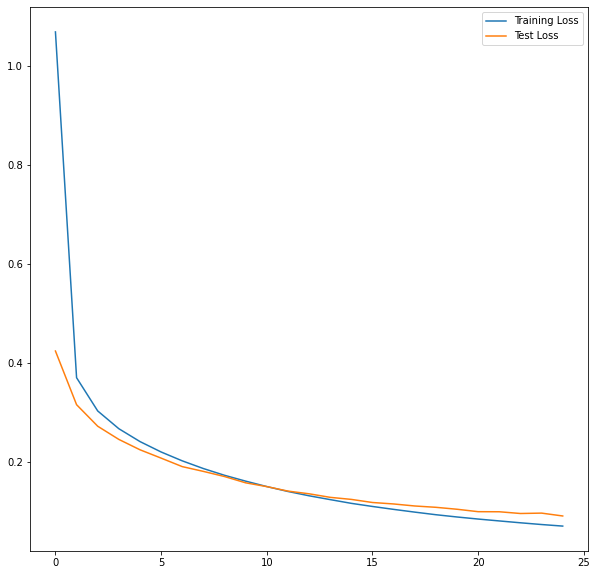

In [17]:
# Plotting the Loss
fig = plt.figure(figsize=(10,10))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.legend()
plt.show()


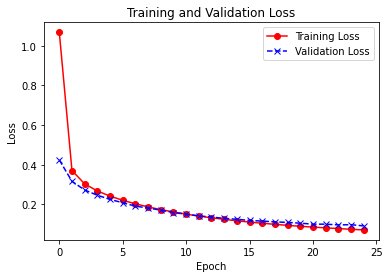

TypeError: ignored

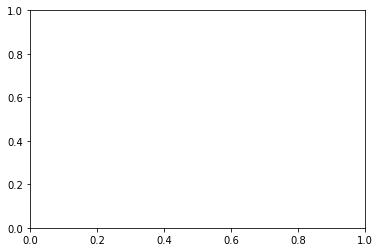

In [41]:
import matplotlib.pyplot as plt
  
# Plot the training and validation loss over time
plt.plot(range(num_epochs), 
         train_loss, color='red', 
         label='Training Loss',
         marker='o')
plt.plot(range(num_epochs), 
         test_loss,
         color='blue', 
         linestyle='--', 
         label='Validation Loss', 
         marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
  
# Plot the training and validation accuracy over time
plt.plot(range(num_epochs), 
         train_accuracy, 
         label='Training Accuracy', 
         color='red', 
         marker='o')
plt.plot(range(num_epochs), 
         test_accuracy, 
         label='Validation Accuracy', 
         color='blue', 
         linestyle=':', 
         marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

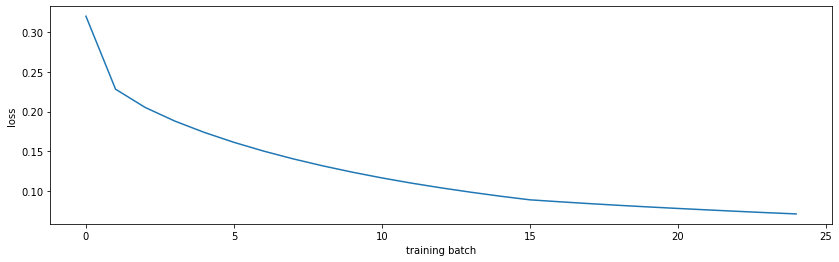

In [26]:
def mean(li): return sum(li)/len(li)
plt.figure(figsize=(14, 4))
plt.xlabel('training batch')
plt.ylabel('loss')
plt.plot([mean(train_loss[i:i+10]) for i in range(len(train_loss))])

# Deneme 1 (başarılı)

In [42]:
def test_label_predictions(model, device, test_loader):
    model.eval()
    actuals = []
    predictions = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(target.view_as(prediction))
            predictions.extend(prediction)
    return [i.item() for i in actuals], [i.item() for i in predictions]

actuals, predictions = test_label_predictions(model, 'cuda', test_loader)
precision = precision_score(actuals, predictions, average='micro')
recall = recall_score(actuals, predictions, average='micro')
tp = sum([predictions[i] == actuals[i] and predictions[i] == k for k in range(10)])
fp = sum([predictions[i] != actuals[i] and predictions[i] == k for k in range(10)])
fn = sum([predictions[i] != actuals[i] and predictions[i] == k for k in range(10)])
mean_average = (tp / (tp + fp + fn))
print('Confusion matrix:')
print(confusion_matrix(actuals, predictions))
print('F1 score: %f' % f1_score(actuals, predictions, average='micro'))
print('Accuracy score: %f' % accuracy_score(actuals, predictions))
print('Precision: {:.2f}, Recall: {:.2f}, TP: {}, FP: {}, FN: {}, Mean Average: {:.2f}'
          .format(precision, recall, tp, fp, fn, mean_average))



Confusion matrix:
[[ 963    0    1    2    0    3    6    2    1    2]
 [   0 1120    3    1    0    1    4    2    4    0]
 [   4    3  998    5    3    0    3    9    7    0]
 [   0    0    2  987    0    6    0    8    3    4]
 [   2    0    7    0  953    0    1    2    1   16]
 [   3    1    0    9    1  862    7    1    4    4]
 [   6    3    1    0    4    9  930    1    4    0]
 [   0    6   10    5    0    1    0  997    1    8]
 [   6    0    3    7    3    6    7    4  934    4]
 [   3    4    1    8    9    3    1    4    0  976]]
F1 score: 0.972000
Accuracy score: 0.972000
Precision: 0.97, Recall: 0.97, TP: 1, FP: 0, FN: 0, Mean Average: 1.00


roc deneme

In [39]:
def test_class_probabilities(model, device, test_loader, which_class):
    model.eval()
    actuals = []
    probabilities = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(target.view_as(prediction) == which_class)

            probabilities.extend(torch.max(np.exp(output[:, which_class]),1))
    return [i.item() for i in actuals], [i.item() for i in probabilities]

which_class = 9
actuals, class_probabilities = test_class_probabilities(model, 'cuda', test_loader, which_class)

fpr, tpr, _ = roc_curve(actuals, class_probabilities)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for digit=%d class' % which_class)
plt.legend(loc="lower right")
plt.show()

TypeError: ignored

# Deneme 2 

In [20]:
"""def predict(img_name, model):
  #predicted_labels = []
  #true_labels = []
  image = cv2.imread(img_name, 0)
  ret,thresholded = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
  print("treshold:" ,thresholded)
  img = 255-thresholded
  cv2_imshow(img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  img = Image.fromarray(img)
  img = transforms_photo(img)
  img = img.view(1, 1, 28, 28)
  img = Variable(img)

  model.eval()

  if torch.cuda.is_available():
    model = model.cuda()
    img = img.cuda()
  
  output = model(img)
  print(output)
  print(output.data)
  _, predicted = torch.max(output, 1)

    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predicted_labels.extend(predicted.numpy())
        true_labels.extend(labels.numpy())
  accuracy = (sum([predicted_labels[i] == true_labels[i] for i in range(len(predicted_labels))]) / len(predicted_labels))
  f1 = f1_score(true_labels, predicted_labels, average='macro')
  precision = precision_score(true_labels, predicted_labels, average='macro')
  recall = recall_score(true_labels, predicted_labels, average='macro')
  tp = sum([predicted_labels[i] == true_labels[i] and predicted_labels[i] == k for k in range(10)])
  fp = sum([predicted_labels[i] != true_labels[i] and predicted_labels[i] == k for k in range(10)])
  fn = sum([predicted_labels[i] != true_labels[i] and true_labels[i] == k for k in range(10)])
  mean_average = (tp / (tp + fp + fn))

  print('Accuracy: {:.2f}%, F1 Score: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, TP: {}, FP: {}, FN: {}, Mean Average: {:.2f}'
          .format(accuracy*100, f1, precision, recall, tp, fp, fn, mean_average))
  return predicted.item()"""

'def predict(img_name, model):\n  #predicted_labels = []\n  #true_labels = []\n  image = cv2.imread(img_name, 0)\n  ret,thresholded = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)\n  print("treshold:" ,thresholded)\n  img = 255-thresholded\n  cv2_imshow(img)\n  cv2.waitKey(0)\n  cv2.destroyAllWindows()\n  img = Image.fromarray(img)\n  img = transforms_photo(img)\n  img = img.view(1, 1, 28, 28)\n  img = Variable(img)\n\n  model.eval()\n\n  if torch.cuda.is_available():\n    model = model.cuda()\n    img = img.cuda()\n  \n  output = model(img)\n  print(output)\n  print(output.data)\n  _, predicted = torch.max(output, 1)\n\n    for images, labels in test_loader:\n        outputs = model(images)\n        _, predicted = torch.max(outputs.data, 1)\n        predicted_labels.extend(predicted.numpy())\n        true_labels.extend(labels.numpy())\n  accuracy = (sum([predicted_labels[i] == true_labels[i] for i in range(len(predicted_labels))]) / len(predicted_labels))\n  f1 = f1_score(true_lab

In [21]:
"""prediction = predict('handwritten3.png', model)
print("Tahmin edilen Label : {}".format(prediction))"""

'prediction = predict(\'handwritten3.png\', model)\nprint("Tahmin edilen Label : {}".format(prediction))'

# Deneme 3

In [25]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
with torch.no_grad():
    predicted_labels = []
true_labels = []
for inputs,labels in test_loader:
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    predicted_labels.extend(predicted.numpy())
    true_labels.extend(labels.numpy())
accuracy = (sum([predicted_labels[i] == true_labels[i] for i in range(len(predicted_labels))]) / len(predicted_labels))
f1 = f1_score(true_labels, predicted_labels, average='macro')
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
tp = sum([predicted_labels[i] == true_labels[i] and predicted_labels[i] == k for k in range(10)])
fp = sum([predicted_labels[i] != true_labels[i] and predicted_labels[i] == k for k in range(10)])
fn = sum([predicted_labels[i] != true_labels[i] and true_labels[i] == k for k in range(10)])
mean_average = (tp / (tp + fp + fn))
print('Accuracy: {:.2f}%, F1 Score: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, TP: {}, FP: {}, FN: {}, Mean Average: {:.2f}'.format(accuracy*100, f1, precision, recall, tp, fp, fn, mean_average))

RuntimeError: ignored